In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\pvanh\AppData\Local\Temp\ipykernel_17524\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# gán data vào path cho giống trong video

In [4]:
data = "D:/KI Machine Learning/face data/train data/"
data_dir = data
os.listdir(data_dir)
os.listdir(os.path.join(data_dir, "happy face"))

image_exts = ["jpeg", "jpg", "bmp", "png"]
image_exts

['jpeg', 'jpg', 'bmp', 'png']

# thử kiểm tra list ảnh

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

-face-human-expressions-emotions-portrait-pointing-looking-excited-147751295.jpg
-smile-for-social-media-networking-or-world-generations-of-women-fit_400_400.jpg
1000_F_142645226_u2th2YE2pgSUP5vQpuatIq2TO8BXZh3J.jpg
1000_F_246149573_1dbnEopMZjSflWG4ZvojXhVVV8cTewTW.jpg
1000_F_267995900_qg8jfTCHvCijDkXC5HOlPBK0pZ0i0dlh.jpg
1000_F_428525113_UZlX1Hk8hRN4YeVI12EfmbekSrlT3uzN.jpg
1000_F_483869839_ySZKdcWnrgXRRDJaZCVuM2we6l3F2vhF.jpg
107366324-1706624523494-gettyimages-1461358156-000005740011.jpeg
10ef561a.jpg
1456d70fbaeff6be5ac3209533e563d3.jpg
1687d86811a2c25b877448ed47218131.jpg
1920_face-new-675956.jpg
19eedf58c6a884eaec995907d3b4fe95.jpg
24-244483_happy-face-people-png-transparent-png.png
254hJanuary2017-22.jpg
313620493.jpg
318978451.jpg
331886716.jpg
403117208.jpg
6.jpg
8e516cbc55d6fa2e793d587c409a6cd6.jpg
911da16541032e4b207ebe3131449a6f.jpg
ab41de97bad1d2f92009222d137b76b6.jpg
akeup-smiling-looking-happy-camera-posing-against-pink-background_1258-88524.jpg
appy-face-human-expressio

# kiểm tra đưa ảnh về dạng array

In [6]:
img = cv2.imread(os.path.join(data, "happy face", "1000_F_483869839_ySZKdcWnrgXRRDJaZCVuM2we6l3F2vhF.jpg"))
img

array([[[ 54,  64, 112],
        [ 53,  63, 110],
        [ 54,  62, 109],
        ...,
        [ 41,  34,  25],
        [ 41,  34,  25],
        [ 42,  36,  25]],

       [[ 54,  64, 111],
        [ 53,  63, 110],
        [ 54,  62, 109],
        ...,
        [ 40,  33,  24],
        [ 40,  33,  24],
        [ 41,  34,  25]],

       [[ 53,  63, 110],
        [ 52,  62, 109],
        [ 53,  61, 108],
        ...,
        [ 38,  31,  22],
        [ 39,  32,  23],
        [ 39,  32,  23]],

       ...,

       [[ 37,  31,  24],
        [ 37,  31,  24],
        [ 38,  32,  25],
        ...,
        [ 26,  20,  25],
        [ 26,  20,  25],
        [ 26,  20,  25]],

       [[ 36,  30,  23],
        [ 37,  31,  24],
        [ 37,  31,  24],
        ...,
        [ 26,  20,  25],
        [ 26,  20,  25],
        [ 26,  20,  25]],

       [[ 36,  30,  23],
        [ 37,  31,  24],
        [ 37,  31,  24],
        ...,
        [ 26,  20,  25],
        [ 26,  20,  25],
        [ 26,  20,  25]]

# kiểm tra shape ảnh

In [7]:
img.shape

(667, 1000, 3)

# in thử ảnh

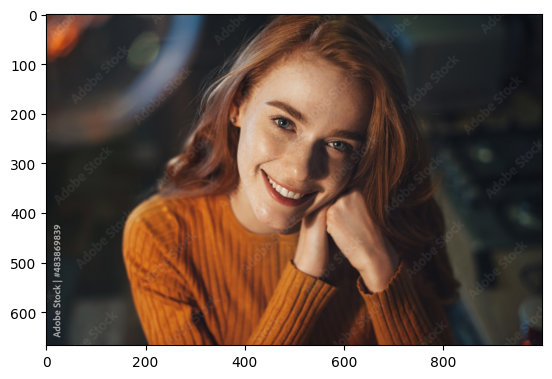

In [8]:
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# các bước phía trên chỉ là để thử, không cần thiết cho code

# lọc ảnh và xóa các ảnh không đáp ứng đúng định dạng

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_exts:
                print("không nằm trong list hợp lệ".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("vấn đề với hình ảnh {}".format(image_path))

In [10]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [11]:
import numpy as np

In [12]:
data1 = tf.keras.utils.image_dataset_from_directory(data)

Found 283 files belonging to 2 classes.


In [13]:
data_iterator = data1.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

# kiểm tra category

In [14]:
batch[1]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

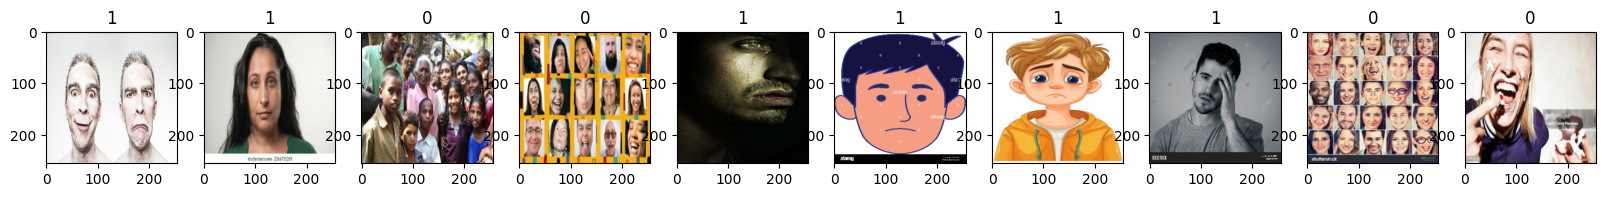

In [15]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))

for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Processing Data

In [16]:
scaled = batch[0] / 255
scaled.max()

np.float32(1.0)

In [17]:
data1 = data1.map(lambda x,y: (x/255, y))
data1.as_numpy_iterator().next()[0].max()

#scaled_iterator = data1.as_numpy_iterator()
#batch = scaled_iterator.next()
#batch[0].max()

np.float32(1.0)

### split data

In [18]:
len(data1)

9

In [19]:
train_size = int(len(data1)*.7)
val_size = int(len(data1)*.2)
test_size = int(len(data1)*.1)+2

In [20]:
# tổng số 3 size phải bằng số batch của data (len(data1) = 9)
train_size + val_size + test_size

9

In [21]:
train = data1.take(train_size)
val = data1.skip(train_size).take(val_size)
test = data1.skip(train_size + val_size).take(test_size)

In [22]:
len(test)

2

# 3. the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

# add converlution with 16 filters (3pixels x 3pixels) scan over image
# relu activation: chuyển mọi giá trị relu <0 thành =0
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# take max value then turn back to Pool
model.add(MaxPooling2D())

# layer thứ 2 tương tự, nhưng 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# 256 neuron với 1 layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Conda\envs\AI2\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile("adam", loss = tf._losses.BinaryCrossentropy(), metrics=["accuracy"])

In [26]:
# check the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

tại phần Flatten ta có 14400 = 30 x 30 x 16
đổi tất cả element (multiple dimension) về single dimesion

# deep learning model

In [27]:
# save model as checkpoint
logdir = "D:/KI Machine Learning/face data/logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.4577 - loss: 0.9392 - val_accuracy: 0.5312 - val_loss: 0.6909
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.4502 - loss: 0.6987 - val_accuracy: 0.4375 - val_loss: 0.7012
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.4751 - loss: 0.7053 - val_accuracy: 0.7812 - val_loss: 0.6682
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.7391 - loss: 0.6683 - val_accuracy: 0.6875 - val_loss: 0.6344
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.6804 - loss: 0.6313 - val_accuracy: 0.6562 - val_loss: 0.5656
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.8024 - loss: 0.5230 - val_accuracy: 0.8438 - val_loss: 0.4634
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.7990 - loss: 0.5116 - val_accuracy: 0.8750 - val_loss: 0.3481
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8109 - loss: 0.4126 - val_accuracy: 0.8125 - val_loss:

theo thời gian, càng về cuối, accuracy càng tăng và loss ngày càng giảm

# kiểm tra Plot Performance

phần này hoàn toàn là để kiểm tra, không ảnh hưởng đến model

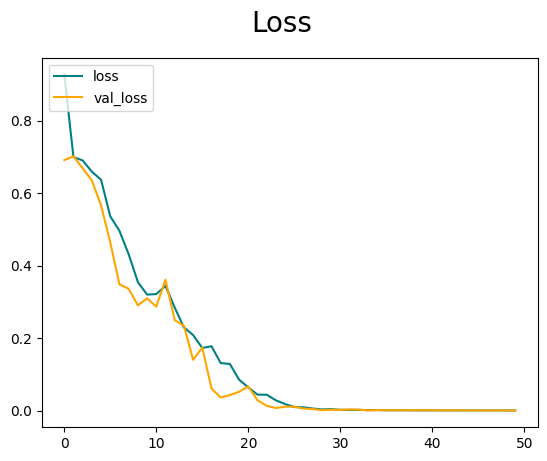

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

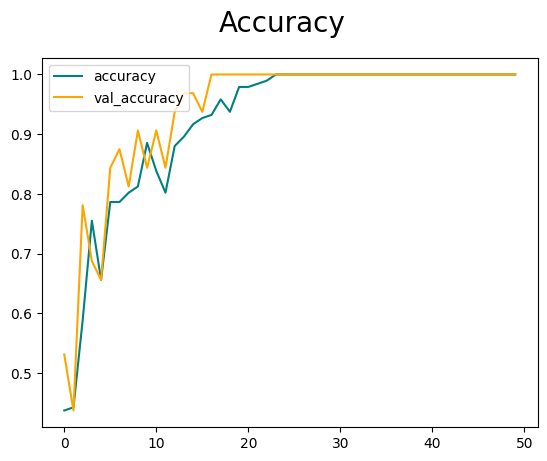

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)

    # how prediction is made
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [34]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

# hiểu đơn giản là higher value better performance

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# test

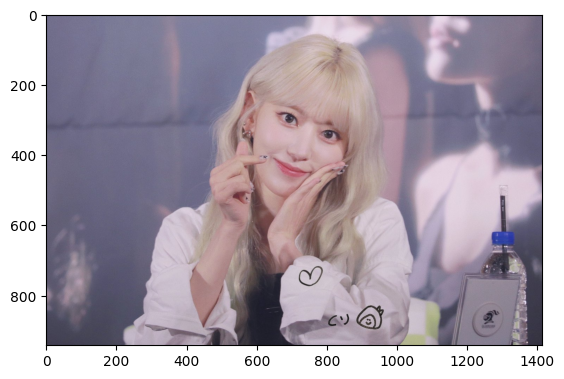

In [35]:
img = cv2.imread('D:/KI Machine Learning/face data/test data/GHQ9r98bgAE1J5s.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# nếu chỉ dùng plt.imshow(img) thì ảnh sẽ ra sai màu

plt.show()

In [36]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.00175114]], dtype=float32)